In [1]:
# Prep: import modules and get pwd
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass  # To get the password without showing the input
password = getpass.getpass()

········


In [2]:
# Get the data
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)

### Create a query to get the list of all unique film titles and a boolean indicating if it was rented (rental_date) in May 2005. 

### Create a query or queries to extract the information you think may be relevant for building the prediction model. It should include some film features and some rental features (X).

In [3]:
# Query and select features to use

query1 = '''SELECT DISTINCT title, rental_duration, rental_rate, length, rating, replacement_cost,
                MAX(
                    CASE
                    WHEN rental_date BETWEEN '2005-05-01' AND '2005-05-31' THEN 1
                    else 0
                END) AS rented_in_may
            FROM film
            LEFT JOIN inventory USING (film_id) 
            LEFT JOIN rental USING(inventory_id)
            GROUP BY film_id
            ORDER BY title ASC;'''


data1 = pd.read_sql(query1, engine)
data1

,title,rental_duration,rental_rate,length,rating,replacement_cost,rented_in_may
0,ACADEMY DINOSAUR,6,0.99,86,PG,20.99,1
1,ACE GOLDFINGER,3,4.99,48,G,12.99,0
2,ADAPTATION HOLES,7,2.99,50,NC-17,18.99,0
3,AFFAIR PREJUDICE,5,2.99,117,G,26.99,1
4,AFRICAN EGG,6,2.99,130,G,22.99,1
...,...,...,...,...,...,...,...
995,YOUNG LANGUAGE,6,0.99,183,G,9.99,0
996,YOUTH KICK,4,0.99,179,NC-17,14.99,0
997,ZHIVAGO CORE,6,0.99,105,NC-17,10.99,1
998,ZOOLANDER FICTION,5,2.99,101,R,28.99,1


In [4]:
query2 = '''SELECT f.title AS title2, c.name AS category
FROM film f JOIN film_category
USING(film_id)
JOIN category c
USING (category_id)
ORDER BY f.title ASC;'''

data2 = pd.read_sql(query2, engine)
data2

,title2,category
0,ACADEMY DINOSAUR,Documentary
1,ACE GOLDFINGER,Horror
2,ADAPTATION HOLES,Documentary
3,AFFAIR PREJUDICE,Horror
4,AFRICAN EGG,Family
...,...,...
995,YOUNG LANGUAGE,Documentary
996,YOUTH KICK,Music
997,ZHIVAGO CORE,Horror
998,ZOOLANDER FICTION,Children


### Read the data into a Pandas dataframe. At this point you should have 1000 rows. Number of columns depends on the number of features you chose.

In [5]:
# Join the two dataframes

data = pd.concat([data1, data2], axis =1)
data

,title,rental_duration,rental_rate,length,rating,replacement_cost,rented_in_may,title2,category
0,ACADEMY DINOSAUR,6,0.99,86,PG,20.99,1,ACADEMY DINOSAUR,Documentary
1,ACE GOLDFINGER,3,4.99,48,G,12.99,0,ACE GOLDFINGER,Horror
2,ADAPTATION HOLES,7,2.99,50,NC-17,18.99,0,ADAPTATION HOLES,Documentary
3,AFFAIR PREJUDICE,5,2.99,117,G,26.99,1,AFFAIR PREJUDICE,Horror
4,AFRICAN EGG,6,2.99,130,G,22.99,1,AFRICAN EGG,Family
...,...,...,...,...,...,...,...,...,...
995,YOUNG LANGUAGE,6,0.99,183,G,9.99,0,YOUNG LANGUAGE,Documentary
996,YOUTH KICK,4,0.99,179,NC-17,14.99,0,YOUTH KICK,Music
997,ZHIVAGO CORE,6,0.99,105,NC-17,10.99,1,ZHIVAGO CORE,Horror
998,ZOOLANDER FICTION,5,2.99,101,R,28.99,1,ZOOLANDER FICTION,Children


In [6]:
# Make sure data matches 

list(data['title']) == list(data['title2'])

True

In [7]:
#Check data types

data.dtypes

title                object
rental_duration       int64
rental_rate         float64
length                int64
rating               object
replacement_cost    float64
rented_in_may         int64
title2               object
category             object
dtype: object

In [8]:
# Check for null values

data.isna().sum()

title               0
rental_duration     0
rental_rate         0
length              0
rating              0
replacement_cost    0
rented_in_may       0
title2              0
category            0
dtype: int64

In [9]:
# Describe data

data.describe().T

,count,mean,std,min,25%,50%,75%,max
rental_duration,1000.0,4.985,1.411654,3.00,4.00,5.00,6.00,7.00
rental_rate,1000.0,2.980,1.646393,0.99,0.99,2.99,4.99,4.99
length,1000.0,115.272,40.426332,46.00,80.00,114.00,149.25,185.00
replacement_cost,1000.0,19.984,6.050833,9.99,14.99,19.99,24.99,29.99
rented_in_may,1000.0,0.627,0.483844,0.00,0.00,1.00,1.00,1.00


In [10]:
data['rented_in_may'].value_counts(dropna=False)

1    627
0    373
Name: rented_in_may, dtype: int64

### Clean Data

In [11]:
# Drop unneeded columns

data = data.drop(columns=['title', 'title2'])

In [12]:
# View data types

data.dtypes

rental_duration       int64
rental_rate         float64
length                int64
rating               object
replacement_cost    float64
rented_in_may         int64
category             object
dtype: object

In [13]:
data.head()

,rental_duration,rental_rate,length,rating,replacement_cost,rented_in_may,category
0,6,0.99,86,PG,20.99,1,Documentary
1,3,4.99,48,G,12.99,0,Horror
2,7,2.99,50,NC-17,18.99,0,Documentary
3,5,2.99,117,G,26.99,1,Horror
4,6,2.99,130,G,22.99,1,Family


### Exploratory Data Analysis - Analyze extracted features

In [14]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:xlabel='rental_rate', ylabel='rented_in_may'>

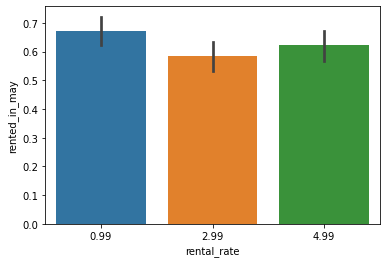

In [15]:
# compare rental rate to rented_in_may

sns.barplot(x='rental_rate',y='rented_in_may',data=data)

<AxesSubplot:xlabel='rating', ylabel='rented_in_may'>

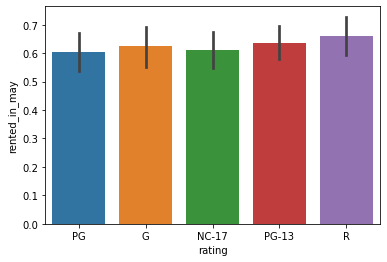

In [16]:
# compare rating to rented_in_may

sns.barplot(x='rating',y='rented_in_may',data=data)

<AxesSubplot:xlabel='rental_duration', ylabel='rented_in_may'>

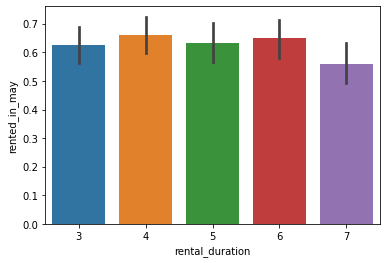

In [17]:
# compare rental_duration to rented_in_may

sns.barplot(x='rental_duration',y='rented_in_may',data=data)

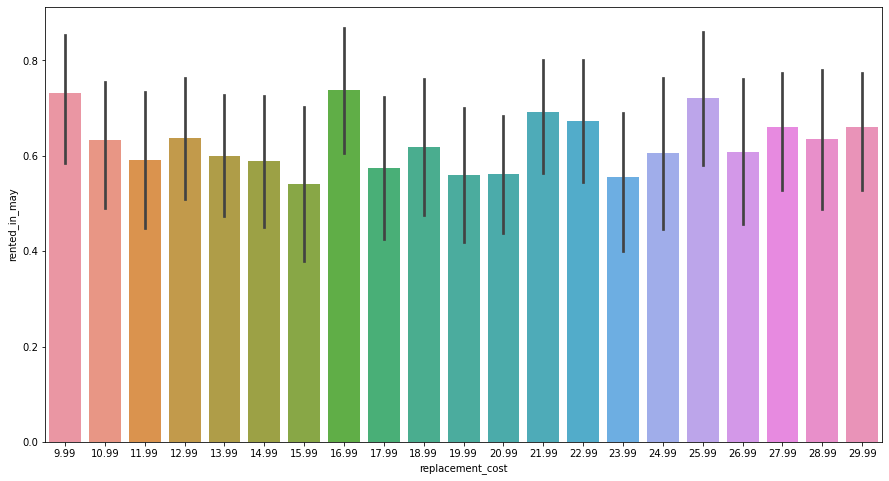

In [18]:
# compare replacement_cost to rented_in_may

fig, ax=plt.subplots(figsize=(15, 8))
ax = sns.barplot(x='replacement_cost',y='rented_in_may',data=data)


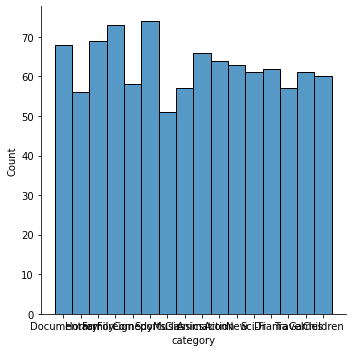

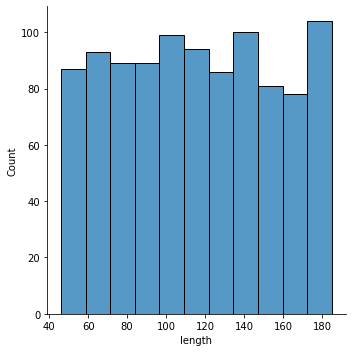

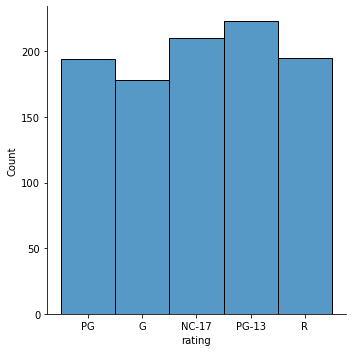

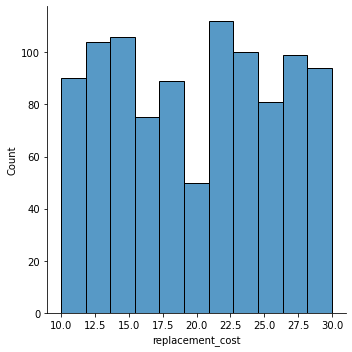

In [19]:
# Look at the scale and distribution of values

sns.displot(data['category'])
plt.show()

sns.displot(data['length'])
plt.show()

sns.displot(data['rating'])
plt.show()

sns.displot(data['replacement_cost'])
plt.show()

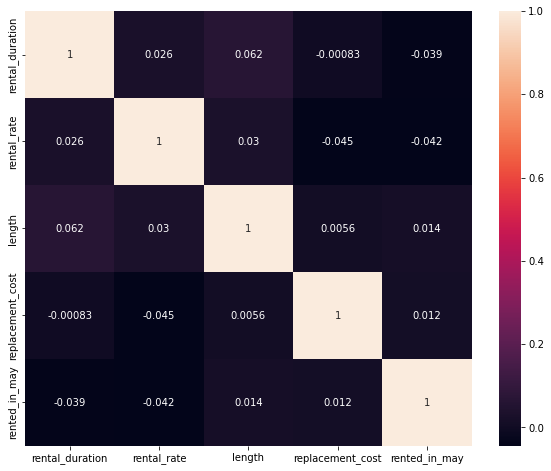

In [20]:
# Look for multicolinearity

corr_matrix=data.corr(method='pearson') 
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

# Processing Data

#### Do X-y-split AND train-test-split 

In [21]:
y = data['rented_in_may']
X = data.drop('rented_in_may', axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
X_train.head()

,rental_duration,rental_rate,length,rating,replacement_cost,category
876,4,0.99,64,PG-13,23.99,Music
419,7,4.99,128,PG,27.99,Sports
459,3,4.99,178,PG-13,26.99,Foreign
306,6,4.99,77,NC-17,9.99,Travel
655,3,0.99,128,PG,9.99,Travel


In [23]:
y_train.head()

876    0
419    0
459    0
306    1
655    1
Name: rented_in_may, dtype: int64

#### Perform transformations on the X_train

In [24]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# for numericals
X_train_num = X_train.select_dtypes(include = np.number)

# Scaling data
transformer = MinMaxScaler().fit(X_train_num) 
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized)

In [25]:
X_train_norm.head()

,0,1,2,3
0,0.25,0.0,0.129496,0.70
1,1.00,1.0,0.589928,0.90
2,0.00,1.0,0.949640,0.85
3,0.75,1.0,0.223022,0.00
4,0.00,0.0,0.589928,0.00


In [26]:
# add column names
X_train_norm.columns = X_train_num.columns
X_train_norm.head()

,rental_duration,rental_rate,length,replacement_cost
0,0.25,0.0,0.129496,0.70
1,1.00,1.0,0.589928,0.90
2,0.00,1.0,0.949640,0.85
3,0.75,1.0,0.223022,0.00
4,0.00,0.0,0.589928,0.00


In [27]:
#for categoricals
X_train_categorical = X_train.select_dtypes(include = object)
X_train_cat = pd.get_dummies(X_train_categorical, 
                             columns=['rating','category'],
                             drop_first=True)
X_train_cat.head()

,rating_NC-17,rating_PG,rating_PG-13,rating_R,category_Animation,category_Children,category_Classics,category_Comedy,category_Documentary,category_Drama,category_Family,category_Foreign,category_Games,category_Horror,category_Music,category_New,category_Sci-Fi,category_Sports,category_Travel
876,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
419,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
459,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
306,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
655,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


#### build X_train and y_train with logistic regression

In [28]:
X_train_transformed = np.concatenate([X_train_norm, X_train_cat], axis=1)

In [30]:
pd.DataFrame(X_train_transformed)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.25,0.0,0.129496,0.70,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.00,1.0,0.589928,0.90,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.00,1.0,0.949640,0.85,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.75,1.0,0.223022,0.00,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.00,0.0,0.589928,0.00,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.50,0.0,0.690647,0.40,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
796,0.25,0.0,0.597122,0.45,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
797,0.25,0.5,0.906475,0.20,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
798,0.00,0.5,0.323741,0.10,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [31]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='saga',
                  multi_class='multinomial').fit(X_train_transformed, y_train)

#### Perform transformations on the X_test after doing X_train with the same transformer

In [32]:
# For numericals
X_test_num = X_test.select_dtypes(include = np.number)

# Scaling data
# we use the same transformer that was trained on the training data
X_test_normalized = transformer.transform(X_test_num)
X_test_norm = pd.DataFrame(X_test_normalized)

In [33]:
X_test_norm.head()

,0,1,2,3
0,0.00,0.0,0.669065,0.80
1,0.50,1.0,0.769784,0.00
2,1.00,0.5,0.280576,0.45
3,0.75,0.5,0.546763,1.00
4,1.00,1.0,0.956835,0.40


In [34]:
# For categoricals
X_test_categorical = X_test.select_dtypes(include = object)
X_test_cat = pd.get_dummies(X_test_categorical, 
                            columns=['rating', 'category'],
                            drop_first=True)

In [35]:
X_test_cat.head()

,rating_NC-17,rating_PG,rating_PG-13,rating_R,category_Animation,category_Children,category_Classics,category_Comedy,category_Documentary,category_Drama,category_Family,category_Foreign,category_Games,category_Horror,category_Music,category_New,category_Sci-Fi,category_Sports,category_Travel
433,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
271,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
961,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
296,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
87,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [36]:
# Verify that dummies columns are in the same order

list(X_train_cat.columns) == list(X_test_cat.columns)

True

In [37]:
# Merge x_test numericals with categoricals

X_test_transformed = np.concatenate([X_test_norm, X_test_cat], axis=1)
pd.DataFrame(X_test_transformed)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.00,0.0,0.669065,0.80,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.50,1.0,0.769784,0.00,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.00,0.5,0.280576,0.45,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.75,0.5,0.546763,1.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.00,1.0,0.956835,0.40,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.50,1.0,0.007194,0.60,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
196,0.00,1.0,0.705036,0.25,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
197,0.25,1.0,0.208633,0.55,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
198,1.00,0.5,0.669065,0.85,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


#### Make predictions on test set

In [39]:
predictions = classification.predict(X_test_transformed)
classification.score(X_test_transformed, y_test)

0.575

In [40]:
print(y_test.value_counts())

1    117
0     83
Name: rented_in_may, dtype: int64


In [41]:
pd.Series(predictions).value_counts()

1    190
0     10
dtype: int64

In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[  4,  79],
       [  6, 111]])